# README
The aim of this notebook is to build a Black-Scholes class to explain theoretical questions I have about options. In particular, I want to especially explore how an option's P&L is affected by realised vs implied volatility. This paper by Paul Wilmott dives into the details: http://spekulant.com.pl/article/Delta%20Hedging/Which%20Free%20Lunch%20Would%20You%20Like%20TodaySir%20DeltaHedgingVolatility.pdf

This info can ultimately be used in a trading strategy on QuantConnect.

# Derivation of the Black-Scholes Equation

The Black-Scholes equation is a partial differential equation that describes the price of an option over time. It is derived using the following steps:

### Assumptions
1. The stock price follows a geometric Brownian motion with constant drift and volatility:
   $$
   dS_t = \mu S_t dt + \sigma S_t dW_t
   $$
   where $S_t$ is the stock price, $\mu$ is the drift rate, $\sigma$ is the volatility, and $W_t$ is a Wiener process.

2. There are no arbitrage opportunities.

3. Trading of the stock and the option is continuous.

4. There are no transaction costs or taxes.

5. The risk-free interest rate $r$ is constant.

### Portfolio Construction
Consider a portfolio $\Pi$ consisting of a long position in one option and a short position in $\Delta$ shares of the stock:
$$
\Pi = V - \Delta S
$$
where $V$ is the price of the option.

### Apply Itô's Lemma to the Option Price Differential
Using Itô's Lemma, the differential of the option price $V(S,t)$ is:
$$
dV = \frac{\partial V}{\partial t} dt + \frac{\partial V}{\partial S} dS + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} (dS)^2
$$

Substituting $dS$ and $(dS)^2$:
$$
dS = \mu S dt + \sigma S dW
$$
$$
(dS)^2 = (\mu S dt + \sigma S dW)^2 = \mu^2 S^2 dt^2 + 2 \mu S \sigma S dt dW + \sigma^2 S^2 (dW)^2
$$

Since $dt^2$ and $dt dW$ are very small and can be ignored (formal proof needs measure theory), and $(dW)^2 = dt$, we get:
$$
(dS)^2 = \sigma^2 S^2 dt
$$

Thus,
$$
dV = \frac{\partial V}{\partial t} dt + \frac{\partial V}{\partial S} (\mu S dt + \sigma S dW) + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} \sigma^2 S^2 dt
$$

Grouping terms, we get:
$$
dV = \left( \frac{\partial V}{\partial t} + \mu S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma S \frac{\partial V}{\partial S} dW
$$

### Calculate Portfolio Differential
The differential of the portfolio $\Pi$ is:
$$
d\Pi = dV - \Delta dS
$$

Substituting $dV$ and $dS$:
$$
d\Pi = \left( \frac{\partial V}{\partial t} + \mu S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma S \frac{\partial V}{\partial S} dW - \Delta (\mu S dt + \sigma S dW)
$$

Combining like terms:
$$
d\Pi = \left( \frac{\partial V}{\partial t} + \mu S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} - \Delta \mu S \right) dt + \left( \sigma S \frac{\partial V}{\partial S} - \Delta \sigma S \right) dW
$$

### Eliminate Directional Risk with Delta

To eliminate risk, set $\Delta = \frac{\partial V}{\partial S}$ which simplifies things to:
$$
d\Pi = \left( \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right) dt
$$
Notice this is deterministic (there is no $dW$ term).

### No-Arbitrage Condition
For no arbitrage, since the portfolio differential is deterministic, the portfolio must earn the risk-free rate:
$$
d\Pi = r \Pi dt
$$

Substituting our equation for $d\Pi$ and using $\Pi = V - \Delta S$ and $\Delta = \frac{\partial V}{\partial S}$, this becomes
$$
\left( \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right) dt = r (V - S \frac{\partial V}{\partial S}) dt
$$

Rearranging terms we get the **Black-Scholes Equation**:
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - r V = 0
$$


# Black-Scholes Formula

### Formula

The Black-Scholes formula is used to calculate the theoretical price of European call and put options. The formula is derived by solving the Black-Scholes equation.

The price of European call options ($C$) and European put options ($P$) is given by:
$$
C = S N(d_1) - K e^{-rT} N(d_2)
$$
and
$$
P = K e^{-rT} N(-d_2) - S N(-d_1)
$$
where:
$$
d_1 = \frac{\ln(S / K) + (r + \sigma^2 / 2) T}{\sigma \sqrt{T}}
$$
$$
d_2 = d_1 - \sigma \sqrt{T}
$$

where:

- $S$: Current stock price
- $K$: Strike price of the option
- $T$: Time to expiration (in years)
- $r$: Risk-free interest rate (annualized)
- $\sigma$: Volatility of the stock (annualized)
- $N(\cdot)$: Cumulative distribution function of the standard normal distribution

### Interpretation of the Formula, $d_1$ and $d_2$

Adapated from https://financetrainingcourse.com/education/2011/03/option-pricing-black-scholes-probabilities-explained-understanding-nd1-vs-nd2/
and Section 3 of https://financetrainingcourse.com/education/wp-content/uploads/2011/03/Understanding.pdf

Recall that the price of any financial instrument is just the present value of its expected future cashflows. We can interpret the Black-Scholes formula in exactly the same way!

If an option expires OTM or ATM, there are no future cashflows. However, if an option expires ITM, there are two future cashflows:
* Payment of the exercise price
* Receipt of the underlying

The two terms in the Black-Scholes formula simply give us the discounted expected value of each of these cashflows! In particular, the payment of the exercise price corresponds to the term containing $d_2$ and the receipt of the underlying corresponds to the term containing $d_1$.

Splitting up the option premium into these two terms allows us to give intuitive probability-based interpretations of $N(d_1)$ and $N(d_2)$. We give tge interpretations for calls but the logic for puts is identical.

#### Payment of the Exercise Price and $N(d_2)$

The exercise price payment is K. We first need to calculate its expected value. Since the payment only occurs if the option expires ITM, we have:
$$
E[K] = K P(S_T > K) + 0 P(S_T \leq K) = K P(S_T > K)
$$

Then we just need to discount this expected value to present value terms which gives

$$
K e^{-rT}P(S_T > K)
$$

Comparing this to the corresponding term in the Black-Scholes formula, we see that 
$$
N(d_2) = P(S_T > K)
$$

In other words: 
* For calls, **$N(d_2)$ is the probability that the option will expire ITM**.
* For puts, **$N(-d_2)$ is the probability that the option will expire ITM**.

#### Receipt of the Underlying and $N(d_1)$

The receipt of the underlying has value $S_T$. We first need to calculate its expected value. Since the receipt only occurs if the options expires ITM, we have:
$$
E[S_T] = E[S_T | S_T > K] P(S_T > K) + 0 P(S_T <= K) = E[S_T | S_T > K] P(S_T > K)
$$

Note the conditional expectation here. This is needed because in the event that the option expires ITM, to calculate the expected value of $S_T$, we should only consider scenarios where the option expires ITM otherwise we will underestimate the expected value. 

The proof is involved but it turns out that the above equation can be written as:
$$
E[S_T] = E[S_T | S_T > K] P(S_T > K) = e^{rT}SN(d_1)
$$
where $S$ is the current underlying price.

The present value of this expected value is then simply:
$$
SN(d_1)
$$

This tells us that $N(d_1)$ is the factor by which the present value of receipt of the underlying (conditional on the option expires ITM) exceeds the current stock price $S$ (and for calls it's $N(-d_1)$ )

# Greeks
The Greeks are measures of the sensitivity of an option's price to its underlying parameters. Here are the formulas which are derived by differentiating the Black-Scholes formula:

### Delta (Δ)
Delta measures the sensitivity of the option's price to changes in the price of the underlying asset. 
* For a call: $$ \Delta = \frac{\partial V}{\partial S} = N(d_1) $$
* For a put: $$ \Delta = \frac{\partial V}{\partial S} = N(d_1) - 1 = N(-d_1) $$

### Gamma (Γ)
Gamma measures the sensitivity of Delta to changes in the price of the underlying asset. 
$$ 
\Gamma = \frac{\partial^2 V}{\partial S^2} =  \frac{N'(d_1)}{S \sigma \sqrt{T}} 
$$ 

### Theta (Θ)
Theta measures the sensitivity of the option's price to the passage of time (time decay).
* For a call: $$ \Theta = \frac{\partial V}{\partial t} = -\frac{S N'(d_1) \sigma}{2 \sqrt{T}} - r K e^{-rT} N(d_2) $$
* For a put: $$ \Theta = \frac{\partial V}{\partial t} = -\frac{S N'(d_1) \sigma}{2 \sqrt{T}} + r K e^{-rT} N(-d_2) $$

### Vega (ν)
Vega measures the sensitivity of the option's price to changes in the volatility of the underlying asset. 

$$ \nu = \frac{\partial V}{\partial \sigma} = S \sqrt{T} N'(d_1) $$

### Vanna (ν)
Vega measures the sensitivity of the option's delta to changes in the volatility of the underlying asset. 

$$ vanna = \frac{\partial \Delta}{\partial \sigma} = T N'(d_1) (1 - d_1) $$

### Rho (ρ)
Rho measures the sensitivity of the option's price to changes in the risk-free interest rate. 
* For a call: $$ \rho = \frac{\partial V}{\partial r} = K T e^{-rT} N(d_2) $$
* For a put: $$ \rho = \frac{\partial V}{\partial r} = -K T e^{-rT} N(-d_2) $$

# Imports

In [1]:
import math
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from matplotlib.cm import get_cmap

In [2]:
class BlackScholesModel:
    """
    Class to model options using the Black-Scholes model.
    """

    def __init__(
        self
    ) -> None:
        """
        Constructor
        """
    ############################
    # Pricing and implied vol
    ############################
    
    def d1_and_d2(
        self,  
        S: float,
        K: float,
        r: float,
        sigma: float,
        t: float
    ) -> tuple:
        """
        Function to calculate the tuple (d1, d2) in the Black-Scholes formula
        """
        # Calculate d1
        numerator_first = math.log(S / K)
        numerator_second = t * (r + (0.5 * (sigma ** 2)))
        denominator = sigma * math.sqrt(t)
        d1 = (numerator_first + numerator_second) / denominator

        # Calculate d2
        d2 = d1 - denominator

        return d1, d2
    
    def price(
        self,
        option_type,
        S: float,
        K: float,
        r: float,
        sigma: float,
        t: float
    ) -> float:
        """
        Function to return the price of an option as in the Black-Scholes formula
        """
        # Calculate d1 and d2
        d1, d2 = self.d1_and_d2(
            S=S,
            K=K,
            r=r,
            sigma=sigma,
            t=t
        )

        # Calculate price
        if option_type == 'Call':
            first_term = S * norm.cdf(d1)
            second_term = K * math.exp(-r * t) * norm.cdf(d2)
            value = first_term - second_term
        elif option_type == 'Put':
            first_term = K * math.exp(-r * t) * norm.cdf(-d2)
            second_term = S * norm.cdf(-d1)
            value = first_term - second_term
        else:
            raise ValueError("Invalid option_type. Must be 'Call' or 'Put'")

        return value

    def implied_vol(
        self,
        option_type: str,
        option_price: float,
        S: float,
        K: float,
        r: float,
        t: float
    ) -> float:
        """
        Function to numerically solve for the implied volatility of an option using its price.
        This is done by a minimization problem to minimize the difference between the price of 
        the option and the Black-Scholes price with implied vol as a variable.
        """
        # Cost function (least squares diff between option price and BS price)
        def cost_function(sigma):
            bs_price = self.price( 
                option_type=option_type,
                S=S,
                K=K,
                r=r,
                sigma=sigma,
                t=t
            )
            return (bs_price - option_price) ** 2

        # Solve for implied vol
        iv = minimize(
            fun=cost_function, 
            x0=0.2, 
            bounds=[(0.000001, 1000)], 
            method='L-BFGS-B', 
            tol=1e-6
        )
        
        return iv.x[0]
    
    ############################
    # Greeks
    ############################
    
    def delta(
        self,
        option_type: str,
        position: str,
        S: float,
        K: float,
        r: float,
        sigma: float,
        t: float
    ) -> float:
        """
        Function to return the delta of an option derived from the Black-Scholes formula. 
        Delta measures the sensitivity of an option's price to a change in price of the underlying.
        """
        # Calculate d1 and d2 (only need d1)
        d1, d2 = self.d1_and_d2(
            S=S,
            K=K,
            r=r,
            sigma=sigma,
            t=t
        )

        # Calculate delta
        if option_type == 'Call':
            value = norm.cdf(d1)
        elif option_type == 'Put':
            value = norm.cdf(d1) - 1
        else:
            raise ValueError("Invalid option_type. Must be 'Call' or 'Put'")

        # Negate if short
        if position == 'Long':
            return value
        elif position == 'Short':
            return - value
        else:
            raise ValueError("Position must be 'Long' or 'Short'")
    
    def gamma(
        self,
        position: str,
        S: float,
        K: float,
        r: float,
        sigma: float,
        t: float
    ) -> float:
        """
        Function to return the gamma of an option derived from the Black-Scholes formula. 
        Gamma measures the sensitivity of an option's delta to a change in price of the underlying.
        """
        # Calculate d1 and d2 (only need d1)
        d1, d2 = self.d1_and_d2(
            S=S,
            K=K,
            r=r,
            sigma=sigma,
            t=t
        )

        # Calculate gamma
        value = norm.pdf(d1) / (S * sigma * math.sqrt(t))

        # Negate if short
        if position == 'Long':
            return value
        elif position == 'Short':
            return - value
        else:
            raise ValueError("Position must be 'Long' or 'Short'")
        
    def vega(
        self,
        position: str,
        S: float,
        K: float,
        r: float,
        sigma: float,
        t: float
    ) -> float:
        """
        Function to return the vega of an option derived from the Black-Scholes formula. 
        Vega measures the sensitivity of an option's price to a change in the volatility of the underlying.
        """
        # Calculate d1 and d2 (only need d1)
        d1, d2 = self.d1_and_d2(
            S=S,
            K=K,
            r=r,
            sigma=sigma,
            t=t
        )

        # Calculate vega
        value = S * norm.pdf(d1) * math.sqrt(t)

        # Negate if short
        if position == 'Long':
            return value
        elif position == 'Short':
            return - value
        else:
            raise ValueError("Position must be 'Long' or 'Short'")

    def theta(
        self,
        option_type: str,
        position: str,
        S: float,
        K: float,
        r: float,
        sigma: float,
        t: float
    ) -> float:
        """
        Function to return the theta of an option derived from the Black-Scholes formula. 
        Theta measures the sensitivity of an option's price to a change in the time to expiry.
        """
        # Calculate d1 and d2
        d1, d2 = self.d1_and_d2(
            S=S,
            K=K,
            r=r,
            sigma=sigma,
            t=t
        )

        # Calculate terms needed for theta
        first_term = S * norm.pdf(d1) * sigma / (2 * math.sqrt(t))
        second_term_common_factor = r * K * math.exp(-r * t)
        
        # Calculate theta
        if option_type == 'Call':
            value = -first_term - (second_term_common_factor * norm.cdf(d2)) 
        elif option_type == 'Put':
            value = -first_term + (second_term_common_factor * norm.cdf(-d2)) 
        else:
            raise ValueError("Invalid option_type. Must be 'Call' or 'Put'")

        # Negate if short
        if position == 'Long':
            return value
        elif position == 'Short':
            return - value
        else:
            raise ValueError("Position must be 'Long' or 'Short'")

    def rho(
        self,
        option_type: str,
        position: str,
        S: float,
        K: float,
        r: float,
        sigma: float,
        t: float
    ) -> float:
        """
        Function to return the rho of an option derived from the Black-Scholes formula. 
        Rho measures the sensitivity of an option's price to a change in the risk-free interest rate.
        """
        # Calculate d1 and d2
        d1, d2 = self.d1_and_d2(
            S=S,
            K=K,
            r=r,
            sigma=sigma,
            t=t
        )

        # Calculate rho
        if option_type == 'Call':
            value = K * t * math.exp(-r * t) * norm.cdf(d2)
        elif option_type == 'Put':
            value = -K * t * math.exp(-r * t) * norm.cdf(-d2)
        else:
            raise ValueError("Invalid option_type. Must be 'Call' or 'Put'")

        # Negate if short
        if position == 'Long':
            return value
        elif position == 'Short':
            return - value
        else:
            raise ValueError("Position must be 'Long' or 'Short'")

    def vanna(
        self,
        position: str,
        S: float,
        K: float,
        r: float,
        sigma: float,
        t: float
    ) -> float:
        """
        Function to return the vanna of an option derived from the Black-Scholes formula. 
        Vanna measures the sensitivity of an option's delta to a change in implied volatility. It equivalentally
        measures the sensititiby of an option's vega to a change in the underlying.
        """
        # Calculate d1 and d2 (only need d1)
        d1, d2 = self.d1_and_d2(
            S=S,
            K=K,
            r=r,
            sigma=sigma,
            t=t
        )

        # Calculate vanna
        value = math.sqrt(t) * norm.pdf(d1) * (1 - d1)

        # Negate if short
        if position == 'Long':
            return value
        elif position == 'Short':
            return - value
        else:
            raise ValueError("Position must be 'Long' or 'Short'")
    
    ############################
    # Simulations
    ############################

    def simulate_gbm(
        self, 
        n_steps: int,
        S_0: float,
        t: float,
        mu: float,
        sigma: float
    ) -> np.ndarray:
        """
        Function to simulate Geometric Brownian Motion of the underlying asset, returning the price path taken by the underlying asset as an array.
        """
        # Calculate time increment
        dt = t / n_steps
        
        # Initialise path array
        path = np.zeros(n_steps + 1)
        path[0] = S_0
        
        # Use discrete form of Geometric Brownian Motion SDE to generate the path
        for step in range(1, n_steps + 1):
            z = np.random.standard_normal()
            path[step] = path[step - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
        
        return path


In [3]:
bsm = BlackScholesModel()

# Exploring Greeks

### How do Greeks change as you move towards expiry? How is this vary by moneyness?

In [4]:
# Fixed properties of each option
K = 200
r = 0.05
sigma = 0.1

# Data across all plots
expiries = np.linspace(0.001, 3, 1000)
spots = [K-30, K, K+30]
option_types = ['Call', 'Put']
positions = ['Long', 'Short']

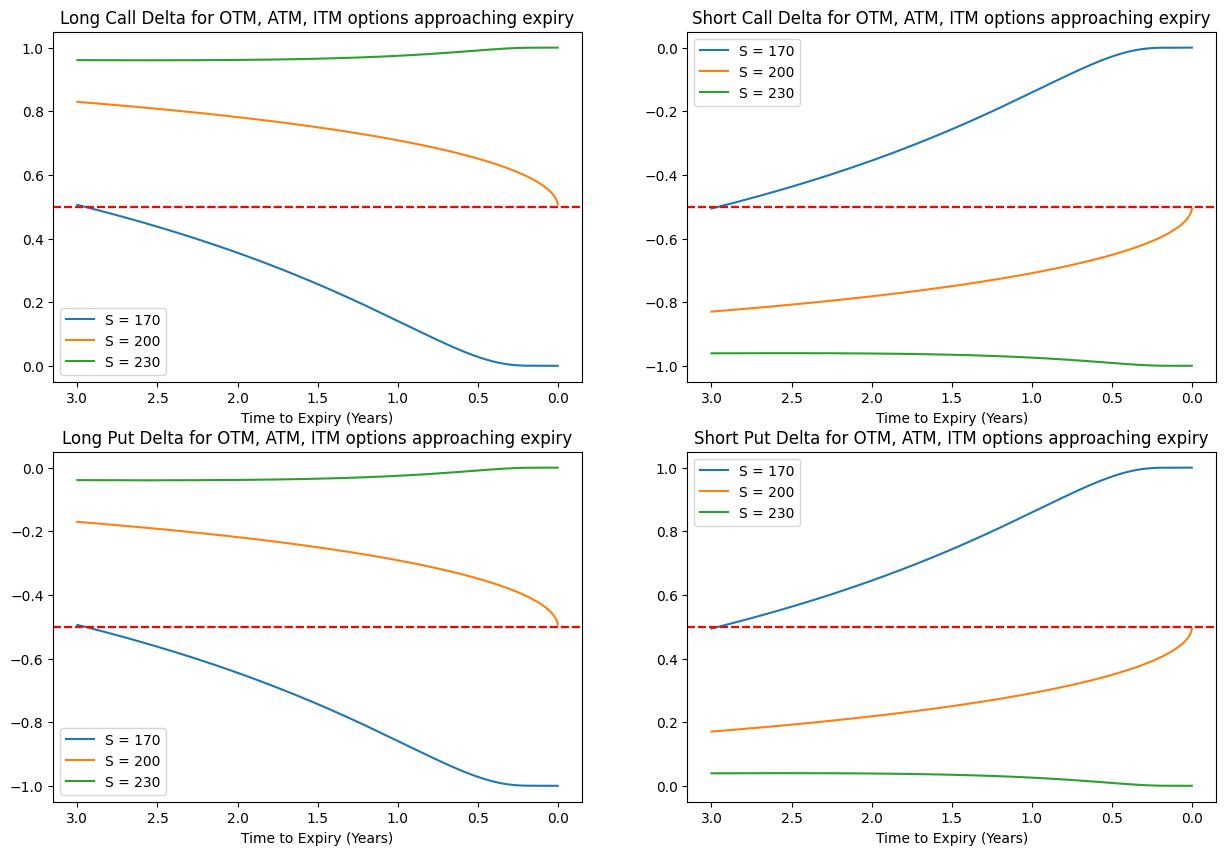

In [5]:
###############################
# Delta
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate delta across expiries for each spot price    
        deltas_per_spot = [
            [
                bsm.delta(
                    option_type=option_type,
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=sigma,
                    t=exp
                ) 
                for exp in expiries
            ]
            for spot in spots
        ]

        # Plot graph
        for deltas, spot in zip(deltas_per_spot, spots):
            ax[i, j].plot(expiries, deltas, label=f"S = {spot}")
            if (option_type == 'Call' and position == 'Long') or (option_type == 'Put' and position == 'Short'):
                ax[i, j].axhline(y=0.5, linestyle='--', color='r')
            else:
                ax[i, j].axhline(y=-0.5, linestyle='--', color='r')
            ax[i, j].invert_xaxis()
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Delta for OTM, ATM, ITM options approaching expiry")
            ax[i, j].set_xlabel('Time to Expiry (Years)')

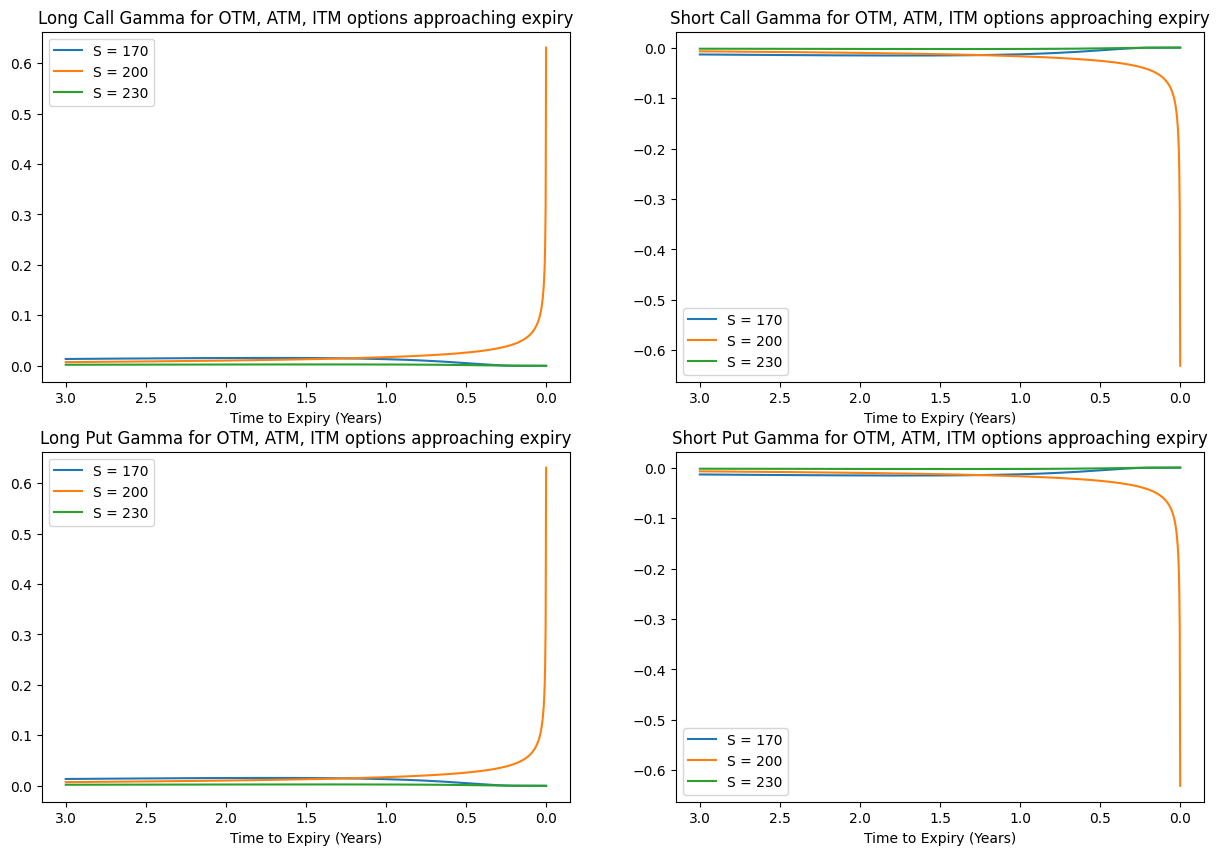

In [6]:
###############################
# Gamma
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate gamma across expiries for each spot price    
        gammas_per_spot = [
            [
                bsm.gamma(
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=sigma,
                    t=exp
                ) 
                for exp in expiries
            ]
            for spot in spots
        ]

        # Plot graph
        for gammas, spot in zip(gammas_per_spot, spots):
            ax[i, j].plot(expiries, gammas, label=f"S = {spot}")
            ax[i, j].invert_xaxis()
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Gamma for OTM, ATM, ITM options approaching expiry")
            ax[i, j].set_xlabel('Time to Expiry (Years)')

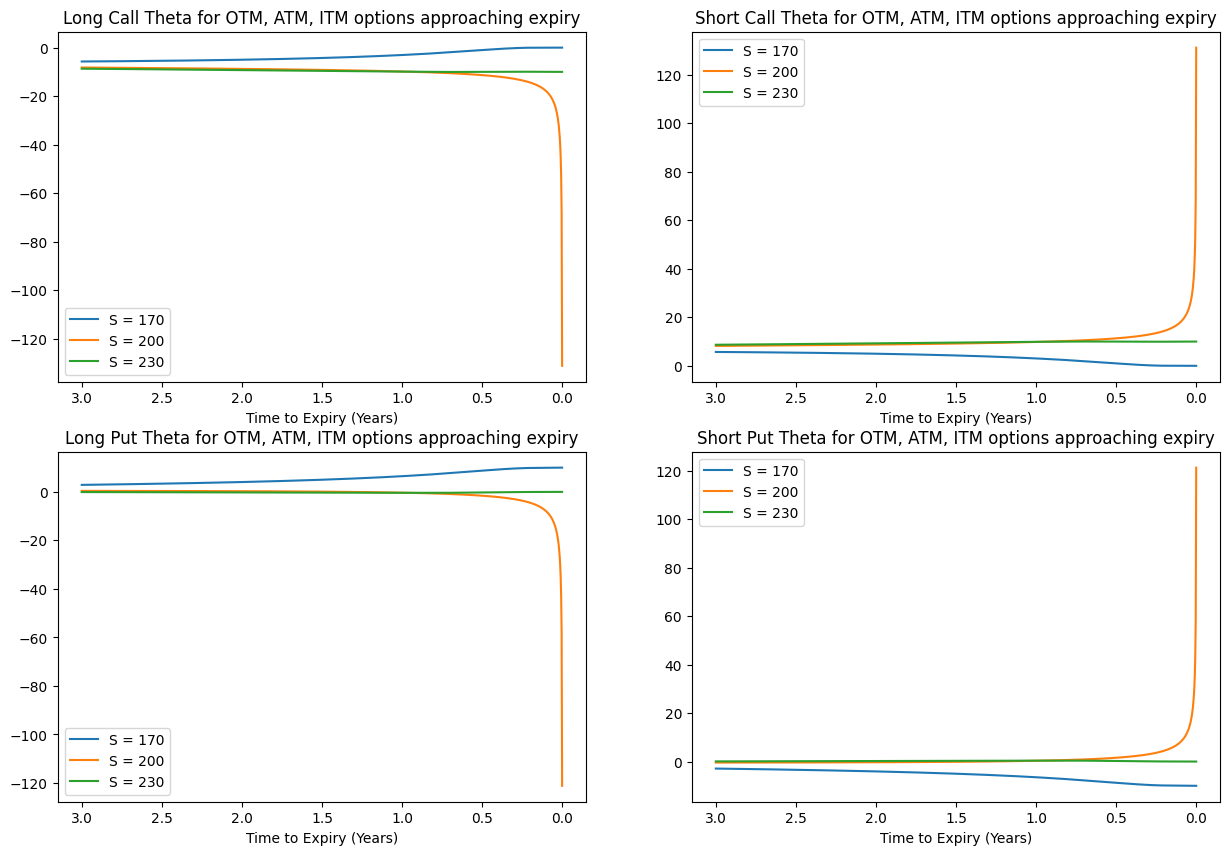

In [7]:
###############################
# Theta
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate theta across expiries for each spot price    
        thetas_per_spot = [
            [
                bsm.theta(
                    option_type=option_type,
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=sigma,
                    t=exp
                ) 
                for exp in expiries
            ]
            for spot in spots
        ]

        # Plot graph
        for thetas, spot in zip(thetas_per_spot, spots):
            ax[i, j].plot(expiries, thetas, label=f"S = {spot}")
            ax[i, j].invert_xaxis()
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Theta for OTM, ATM, ITM options approaching expiry")
            ax[i, j].set_xlabel('Time to Expiry (Years)')

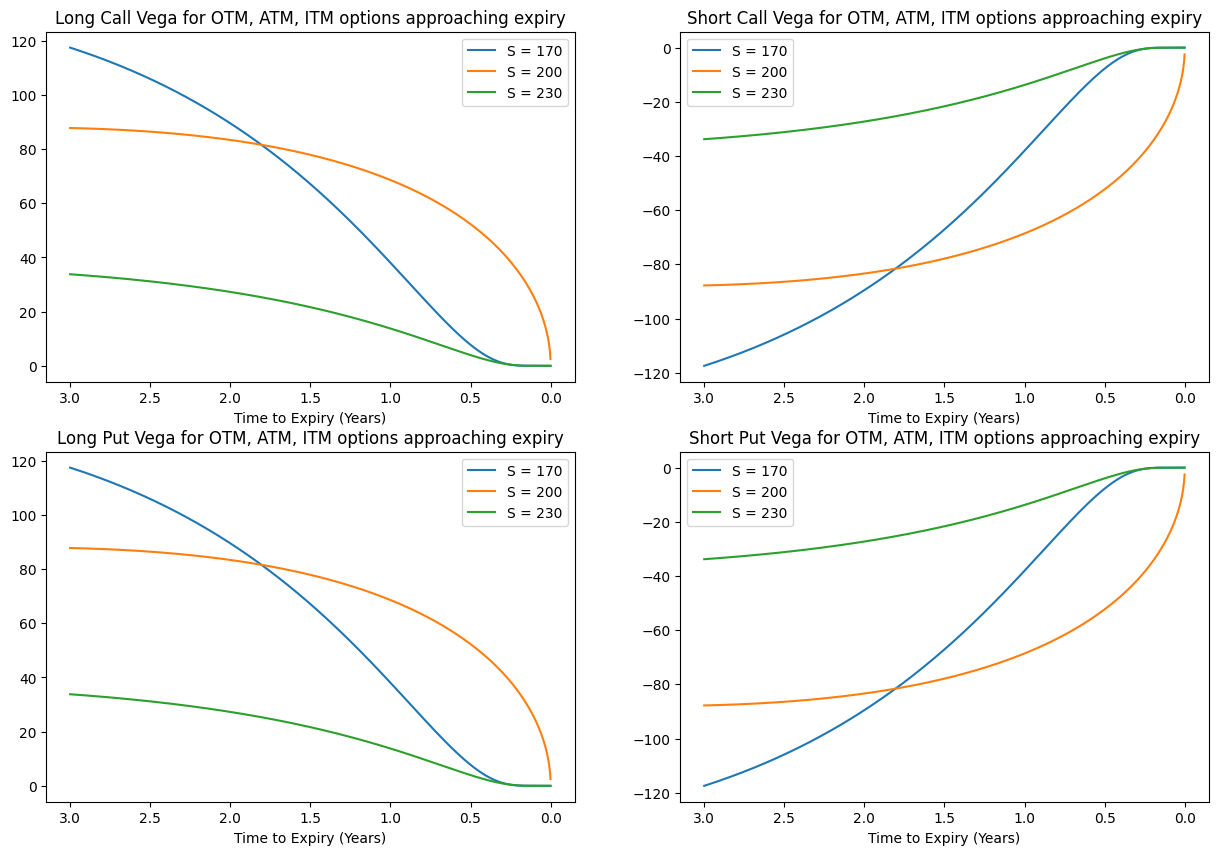

In [8]:
###############################
# Vega
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate vega across expiries for each spot price    
        vegas_per_spot = [
            [
                bsm.vega(
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=sigma,
                    t=exp
                ) 
                for exp in expiries
            ]
            for spot in spots
        ]

        # Plot graph
        for vegas, spot in zip(vegas_per_spot, spots):
            ax[i, j].plot(expiries, vegas, label=f"S = {spot}")
            ax[i, j].invert_xaxis()
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Vega for OTM, ATM, ITM options approaching expiry")
            ax[i, j].set_xlabel('Time to Expiry (Years)')

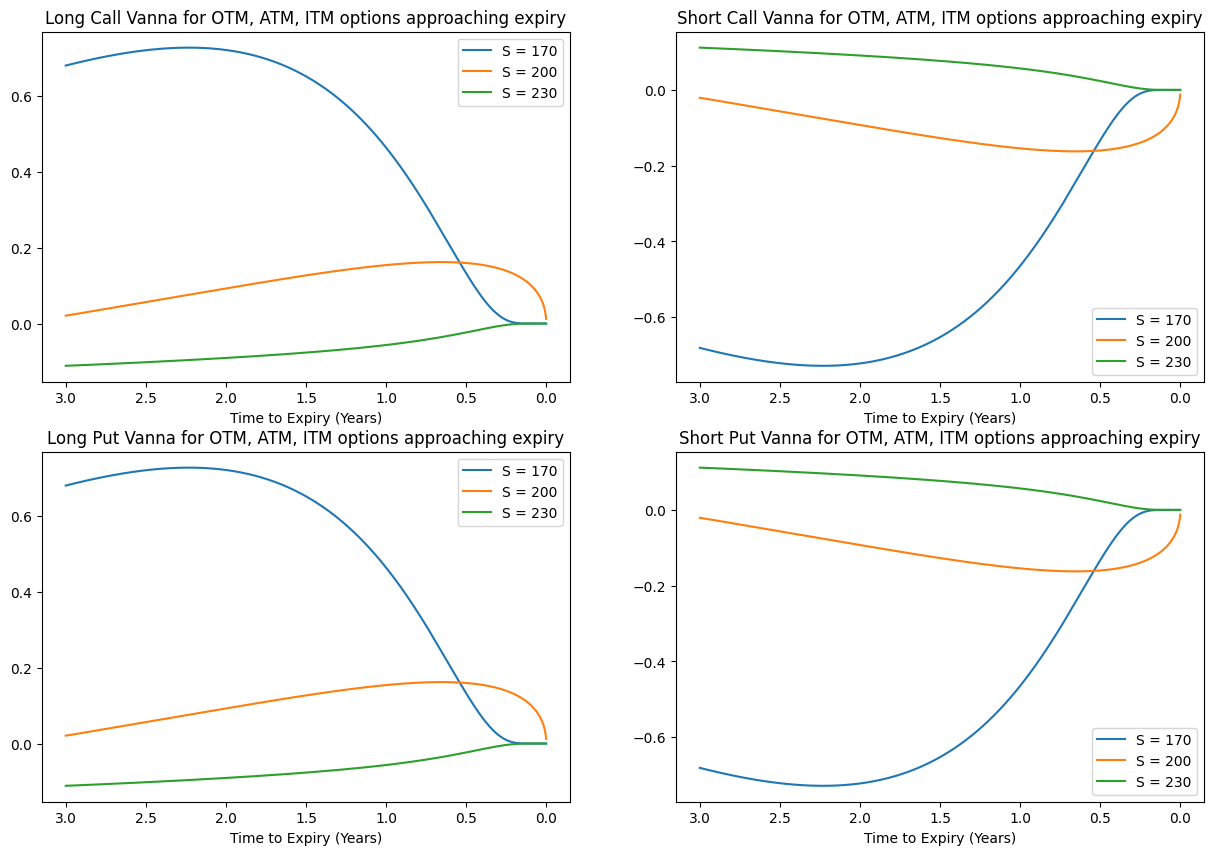

In [9]:
###############################
# Vanna
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate vanna across expiries for each spot price    
        vannas_per_spot = [
            [
                bsm.vanna(
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=sigma,
                    t=exp
                ) 
                for exp in expiries
            ]
            for spot in spots
        ]

        # Plot graph
        for vannas, spot in zip(vannas_per_spot, spots):
            ax[i, j].plot(expiries, vannas, label=f"S = {spot}")
            ax[i, j].invert_xaxis()
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Vanna for OTM, ATM, ITM options approaching expiry")
            ax[i, j].set_xlabel('Time to Expiry (Years)')

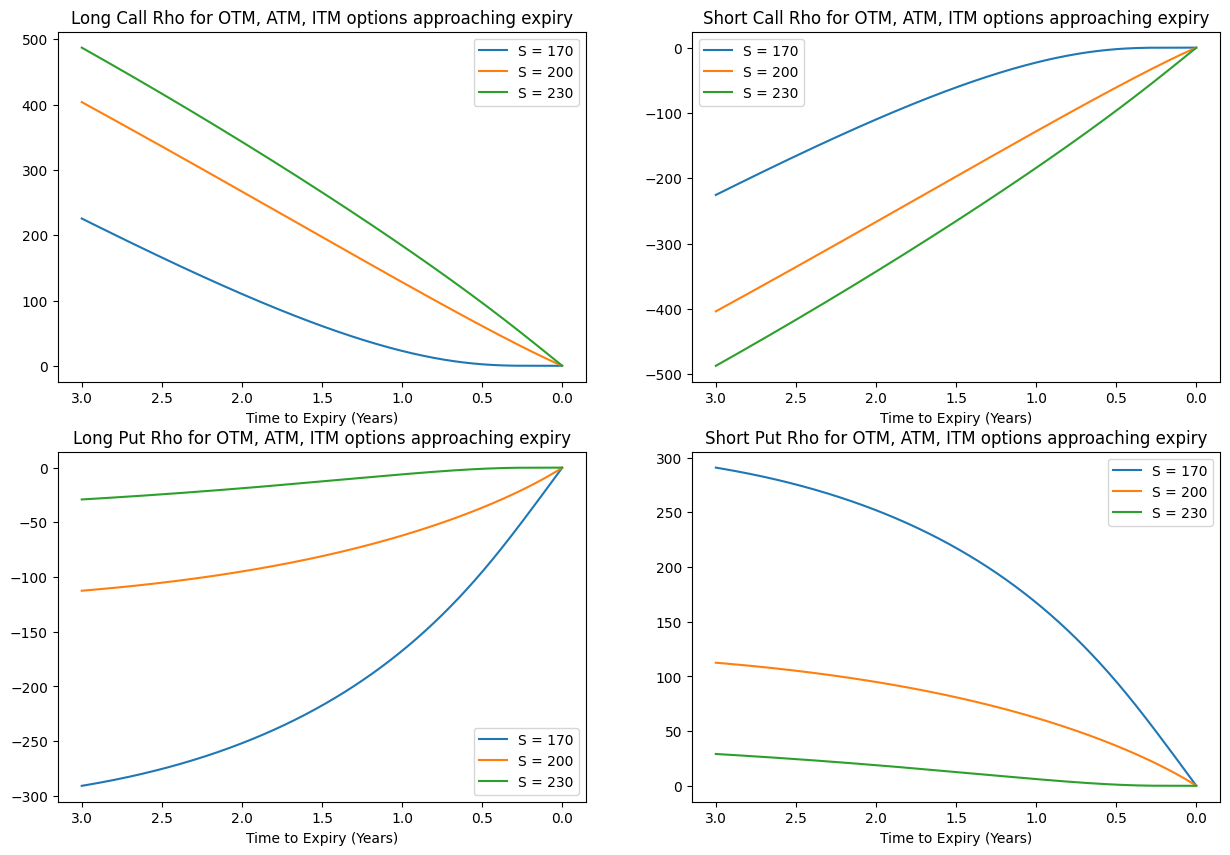

In [10]:
###############################
# Rho
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate rho across expiries for each spot price    
        rhos_per_spot = [
            [
                bsm.rho(
                    option_type=option_type,
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=sigma,
                    t=exp
                ) 
                for exp in expiries
            ]
            for spot in spots
        ]

        # Plot graph
        for rhos, spot in zip(rhos_per_spot, spots):
            ax[i, j].plot(expiries, rhos, label=f"S = {spot}")
            ax[i, j].invert_xaxis()
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Rho for OTM, ATM, ITM options approaching expiry")
            ax[i, j].set_xlabel('Time to Expiry (Years)')

### How do Greeks change by moneyness? How does this vary by IV?

In [11]:
# Fixed properties of each option
K = 200
r = 0.05
t = 0.5

# Data across all plots
spots = np.linspace(K-50, K+50, 1000)
ivs = [0.1, 0.15, 0.2, 0.25, 0.3]
option_types = ['Call', 'Put']
positions = ['Long', 'Short']

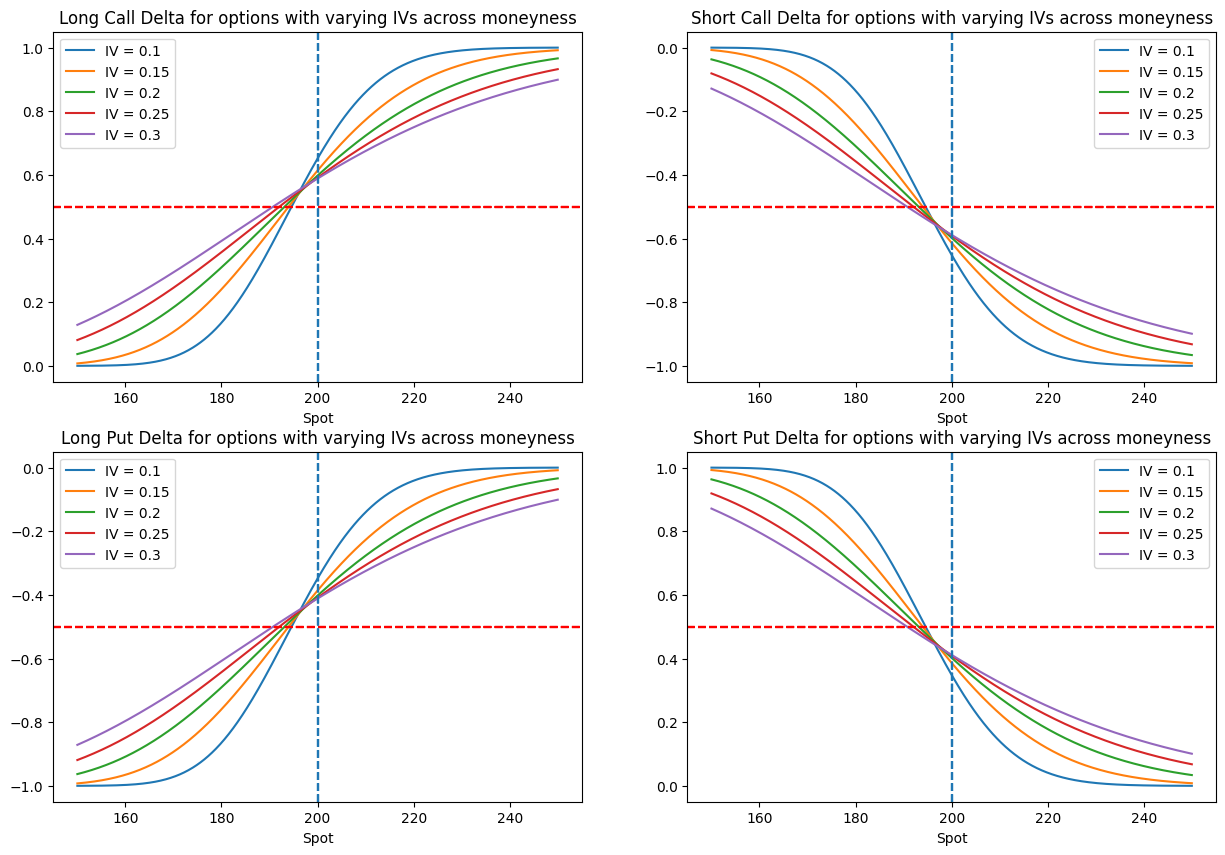

In [12]:
###############################
# Delta
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate delta across spots for each IV    
        deltas_per_iv = [
            [
                bsm.delta(
                    option_type=option_type,
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=iv,
                    t=t
                ) 
                for spot in spots
            ]
            for iv in ivs
        ]

        # Plot graph
        for deltas, iv in zip(deltas_per_iv, ivs):
            ax[i, j].plot(spots, deltas, label=f"IV = {iv}")
            ax[i, j].axvline(x=K, linestyle='--')
            if (option_type == 'Call' and position == 'Long') or (option_type == 'Put' and position == 'Short'):
                ax[i, j].axhline(y=0.5, linestyle='--', color='r')
            else:
                ax[i, j].axhline(y=-0.5, linestyle='--', color='r')
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Delta for options with varying IVs across moneyness")
            ax[i, j].set_xlabel('Spot')

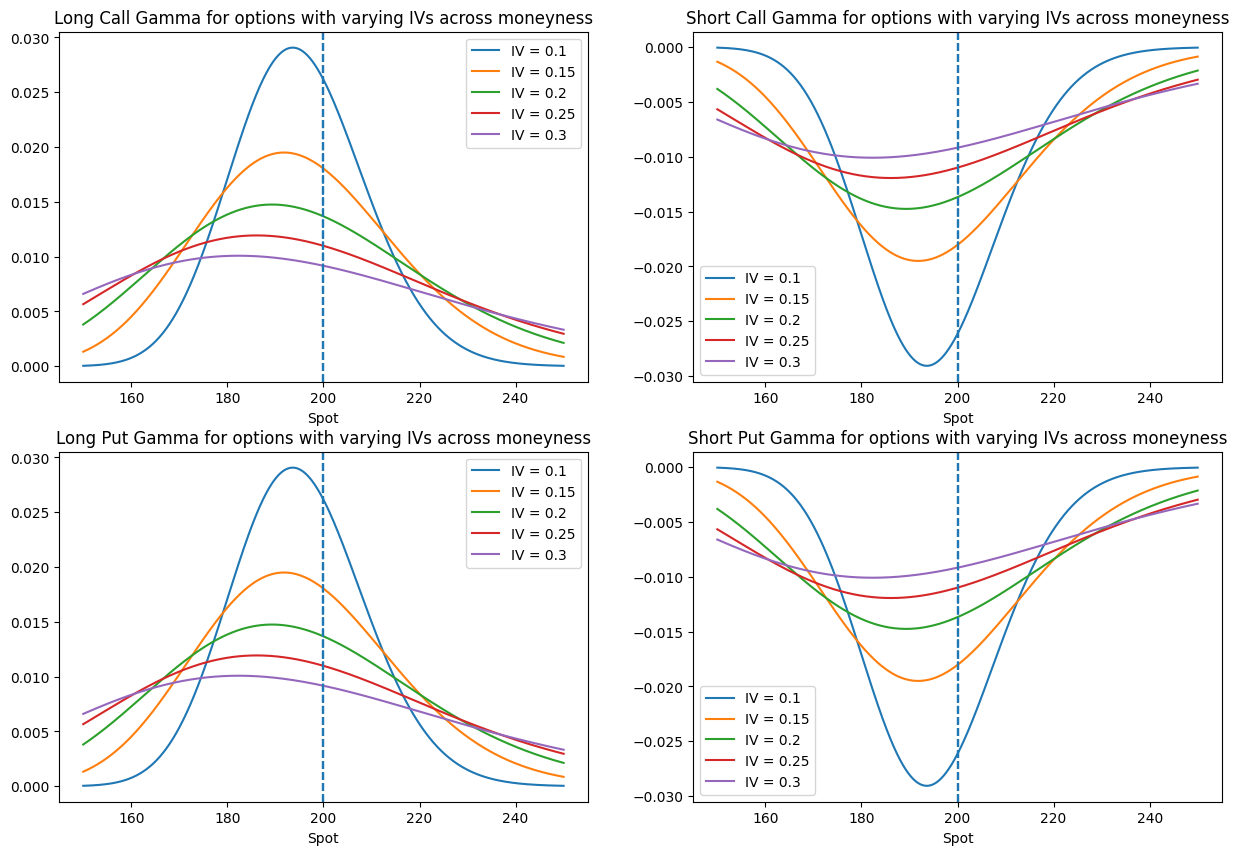

In [13]:
###############################
# Gamma
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate gamma across spots for each IV    
        gammas_per_iv = [
            [
                bsm.gamma(
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=iv,
                    t=t
                ) 
                for spot in spots
            ]
            for iv in ivs
        ]

        # Plot graph
        for gammas, iv in zip(gammas_per_iv, ivs):
            ax[i, j].plot(spots, gammas, label=f"IV = {iv}")
            ax[i, j].axvline(x=K, linestyle='--')
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Gamma for options with varying IVs across moneyness")
            ax[i, j].set_xlabel('Spot')

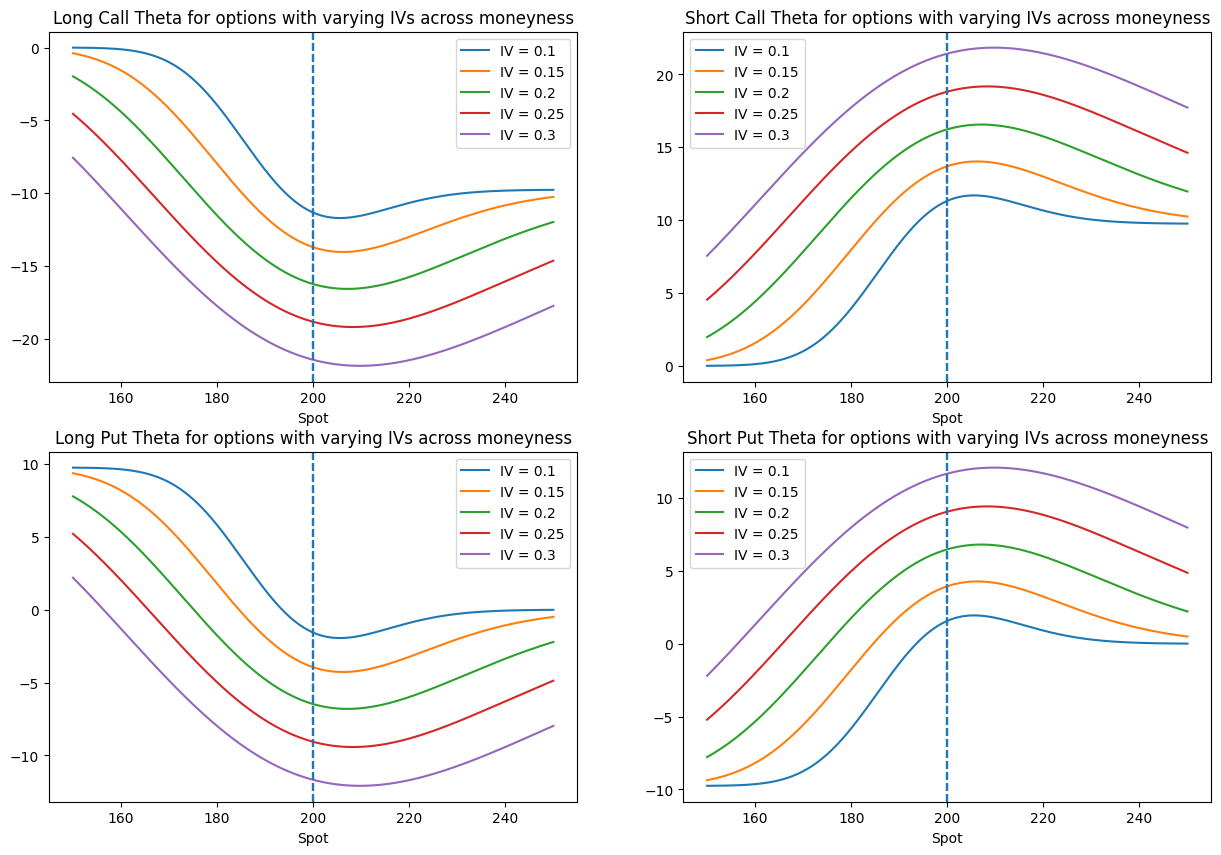

In [14]:
###############################
# Theta
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate theta across spots for each IV    
        thetas_per_iv = [
            [
                bsm.theta(
                    option_type=option_type,
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=iv,
                    t=t
                ) 
                for spot in spots
            ]
            for iv in ivs
        ]

        # Plot graph
        for thetas, iv in zip(thetas_per_iv, ivs):
            ax[i, j].plot(spots, thetas, label=f"IV = {iv}")
            ax[i, j].axvline(x=K, linestyle='--')
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Theta for options with varying IVs across moneyness")
            ax[i, j].set_xlabel('Spot')

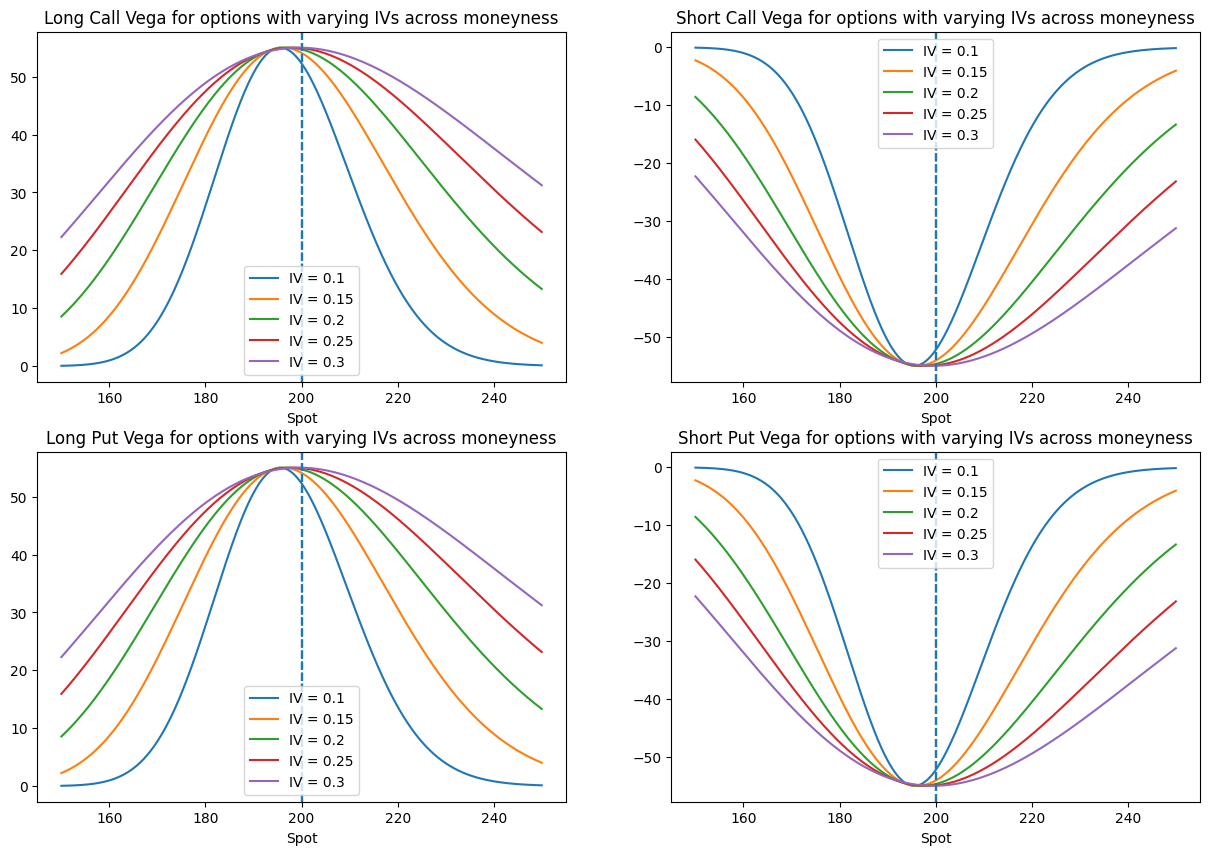

In [15]:
###############################
# Vega
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate vega across spots for each IV    
        vegas_per_iv = [
            [
                bsm.vega(
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=iv,
                    t=t
                ) 
                for spot in spots
            ]
            for iv in ivs
        ]

        # Plot graph
        for vegas, iv in zip(vegas_per_iv, ivs):
            ax[i, j].plot(spots, vegas, label=f"IV = {iv}")
            ax[i, j].axvline(x=K, linestyle='--')
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Vega for options with varying IVs across moneyness")
            ax[i, j].set_xlabel('Spot')

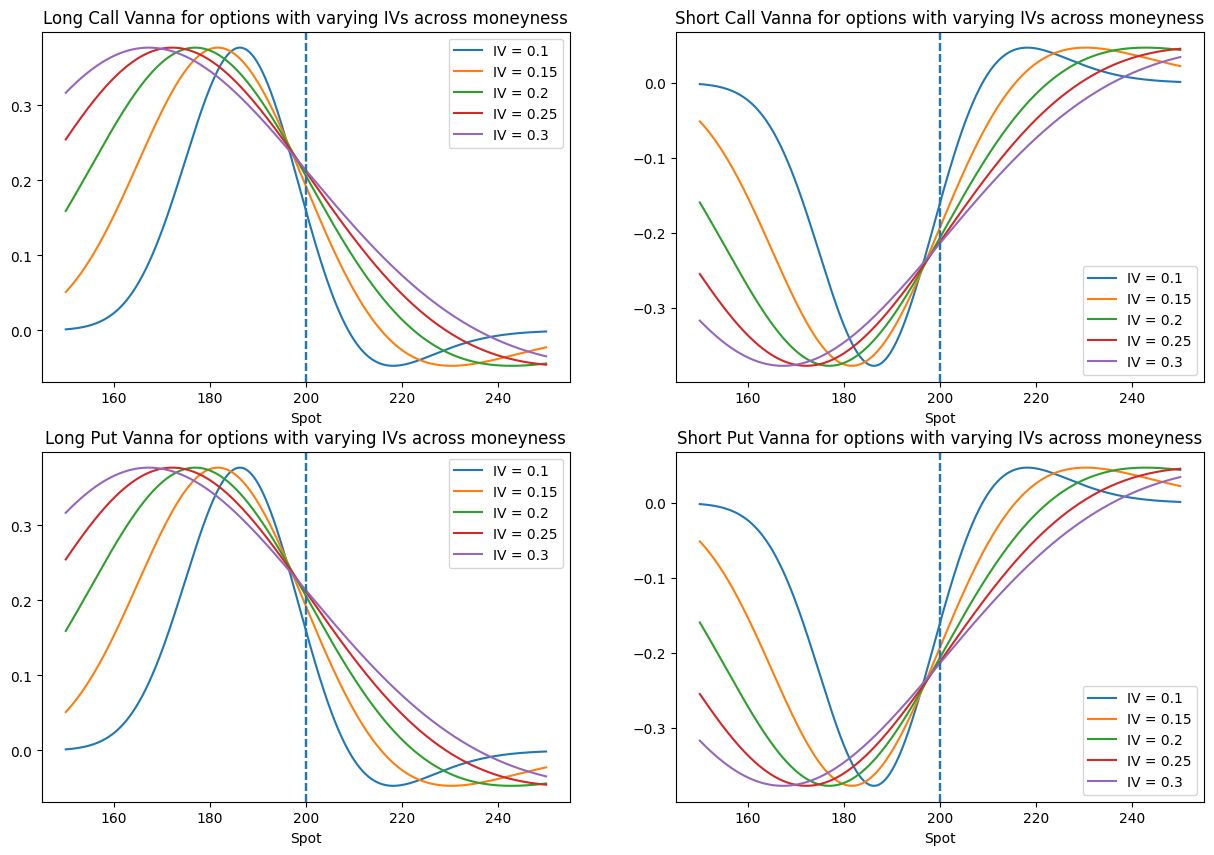

In [16]:
###############################
# Vanna
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate vanna across spots for each IV    
        vannas_per_iv = [
            [
                bsm.vanna(
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=iv,
                    t=t
                ) 
                for spot in spots
            ]
            for iv in ivs
        ]

        # Plot graph
        for vannas, iv in zip(vannas_per_iv, ivs):
            ax[i, j].plot(spots, vannas, label=f"IV = {iv}")
            ax[i, j].axvline(x=K, linestyle='--')
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Vanna for options with varying IVs across moneyness")
            ax[i, j].set_xlabel('Spot')

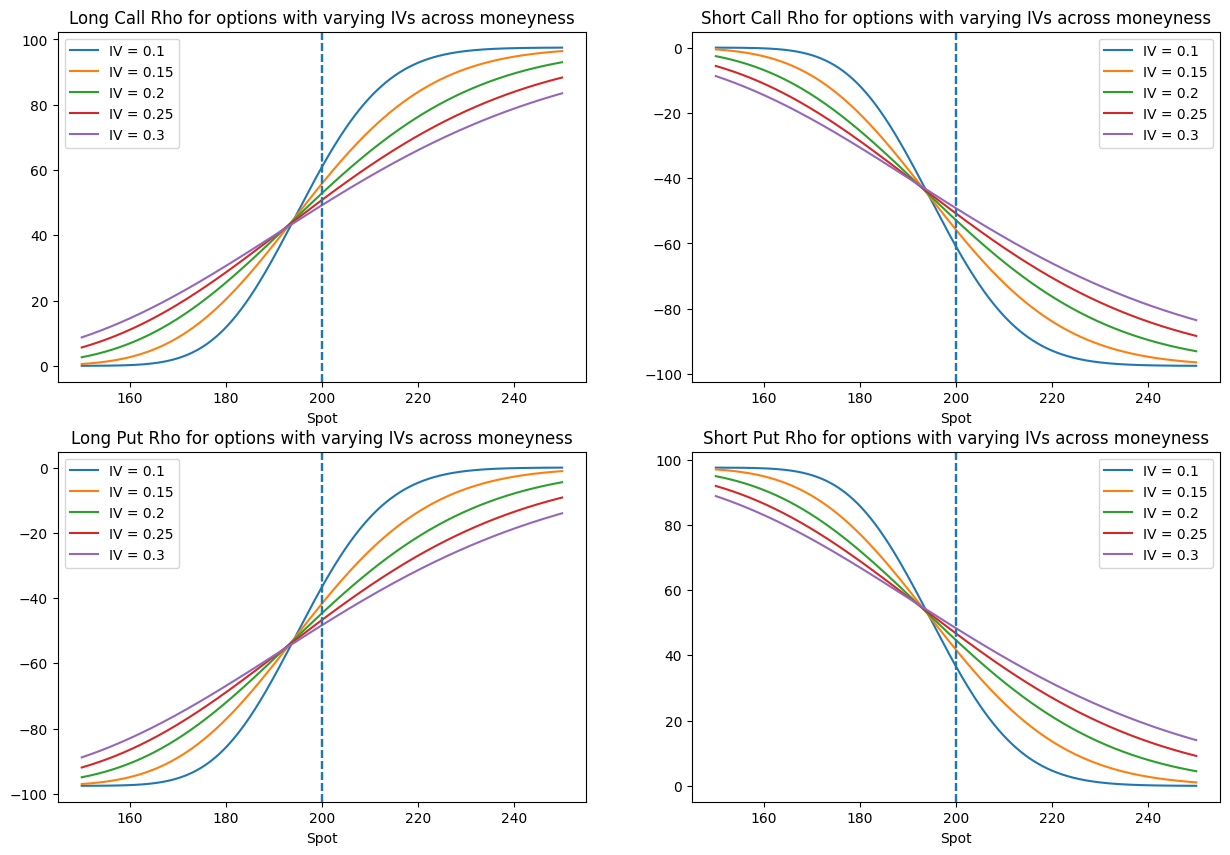

In [17]:
###############################
# Rho
###############################

# Set up subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, option_type in enumerate(option_types):
    for j, position in enumerate(positions):
        # Calculate rho across spots for each IV    
        rhos_per_iv = [
            [
                bsm.rho(
                    option_type=option_type,
                    position=position,
                    S=spot,
                    K=K,
                    r=r,
                    sigma=iv,
                    t=t
                ) 
                for spot in spots
            ]
            for iv in ivs
        ]

        # Plot graph
        for rhos, iv in zip(rhos_per_iv, ivs):
            ax[i, j].plot(spots, rhos, label=f"IV = {iv}")
            ax[i, j].axvline(x=K, linestyle='--')
            ax[i, j].legend()
            ax[i, j].set_title(f"{position} {option_type} Rho for options with varying IVs across moneyness")
            ax[i, j].set_xlabel('Spot')

In [18]:
# TODO TODAY:
# Add markdown to explain what's going on

# TODO LATER
# Payoff diagrams for vol plays 
# Add other Greeks over time